In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast

# fig3
### fig3a-3b

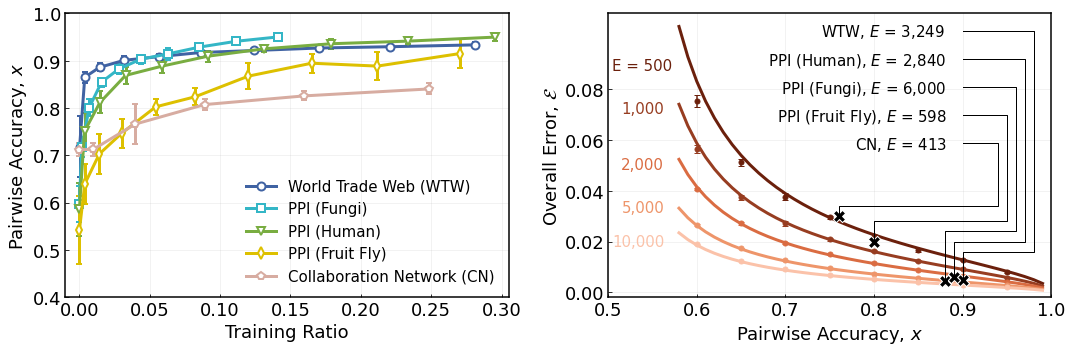

In [2]:
network_list = ['WTW', 'fungi', 'human', 'fruit_fly', 'complex_networks']
label_list = ['World Trade Web (WTW)', 'PPI (Fungi)', 'PPI (Human)', 'PPI (Fruit Fly)', 'Collaboration Network (CN)']
marker_list = ['o', 's',  'v', 'd', 'p', '.']
color_list = ['#4063a3', '#34b6c6', '#79ad41', '#ddc000', '#d7aca1']
fig = plt.figure(figsize=(15, 5))

for counter in [1, 2]:
    ax = plt.subplot(1, 2, counter)
    if counter == 1:
        for i in range(5):
            network_name = network_list[i]
            data_df = pd.read_csv('../data/accuracy_vs_training_ratio/'+network_name+'_accuracy_training_ratio.csv')
            ratio_list = [0.01]+ list(np.round(np.arange(0.1, 1, 0.1), 2))
            data_df = data_df.query('ratio_pair == @ratio_list')
            data_df = data_df.query('ratio_all < 0.35')
            plt.errorbar(data_df.ratio_all, data_df.ensemble, data_df.ensemble_std, 
                         marker=marker_list[i], c=color_list[i], linewidth=3, markersize=8,
                         markerfacecolor='white', markeredgewidth=2, capsize=3, label= label_list[i])
        handles, labels = ax.get_legend_handles_labels()
        handles = [h[0] for h in handles]
        ax.legend(handles, labels, fontsize=15, frameon=False)
        plt.xlim(-0.01, 0.305)
        plt.ylim(0.4, 1)
        #ax.set_yticks([0, 0.05, 0.1, 0.15])
        plt.xlabel('Training Ratio', fontsize=18)
        plt.ylabel('Pairwise Accuracy, $x$', fontsize=18)
    if counter == 2:
        color_list = ["#6b200c", "#973d21", "#da6c42", "#ee956a", "#fbc2a9"]
        data_df = pd.read_csv('../data/overall_error/simulations_error_all.csv')
        E_list = [500, 1000, 2000, 5000, 10000]
        label_list = ['500', '1,000', '2,000', '5,000', '10,000']
        marker_list = ['o', 's',  'v', 'd', 'p', '*']
        x_list = np.arange(0.58, 1, 0.01)
        c = 0.76
        for i in range(5):
            E = E_list[i]
            temp_df = data_df.query('E == {}'.format(E))
            plt.errorbar(temp_df.accuracy, temp_df.average_error, temp_df.error_std, c=color_list[i], 
                         marker='o',
                         capsize=3, markersize=5, ls='none', label='E = %s'%label_list[i])
            y_list = c*np.sqrt(x_list*(1 - x_list))/(2*x_list - 1)/np.sqrt(E)
            plt.plot(x_list, y_list, c=color_list[i], linewidth=3, label=None)
        #point_x=[3249, 6000, 2840, 598, 413, ] # WTW, fungi, human, friut_fly, complex
        point_y=[0.90, 0.88, 0.89, 0.80, 0.76]
        point_z=[0.004974, 0.0043138, 0.0059001, 0.019821, 0.030041]
        plt.scatter(point_y, point_z, c='black', marker='X', edgecolor='white', s=150, zorder=3)
        netname_pos_list = [(0.48, 0.92), (0.36, 0.82), (0.39, 0.72), (0.38, 0.62), (0.557, 0.52)] #(0.4, 0.47)
        netname_text_list = ['WTW, $E$ = 3,249', 'PPI (Human), $E$ = 2,840', 'PPI (Fungi), $E$ = 6,000', 
                            'PPI (Fruit Fly), $E$ = 598', 'CN, $E$ = 413'] #'Collaboration (CN)\n                $E$ = 413'
        for i in range(5):
            ax.text(netname_pos_list[i][0], netname_pos_list[i][1], netname_text_list[i], 
                    transform=ax.transAxes, fontsize=15)
        plt.plot([0.9, 0.9, 0.98, 0.98, 0.9], [0.004974, 0.016, 0.016, 0.103, 0.103], c='black', linewidth=1, zorder=10)
        plt.plot([0.89, 0.89, 0.97, 0.97, 0.9], [0.0059, 0.02, 0.02, 0.092, 0.092], c='black', linewidth=1, zorder=10)
        plt.plot([0.88, 0.88, 0.96, 0.96, 0.9], [0.0043, 0.024, 0.024, 0.081, 0.081], c='black', linewidth=1, zorder=10)
        plt.plot([0.8, 0.8, 0.95, 0.95, 0.9], [0.0198, 0.028, 0.028, 0.07, 0.07], c='black', linewidth=1, zorder=10)
        plt.plot([0.76, 0.76, 0.94, 0.94, 0.9], [0.03, 0.034, 0.034, 0.059, 0.059], c='black', linewidth=1, zorder=10)
        #[0.76, 0.76, 0.94, 0.94, 0.9], [0.03, 0.034, 0.034, 0.057, 0.057]
        e_pos_list = [(0.01, 0.8), (0.03, 0.65), (0.03, 0.45), (0.03, 0.3), (0.01, 0.18)]
        e_text_list = ['E = 500', '1,000', '2,000', '5,000', '10,000']
        #ax.text(0.02, 0.9, 'E = ', transform=ax.transAxes, fontsize=15)
        for i in range(5):
            ax.text(e_pos_list[i][0], e_pos_list[i][1], e_text_list[i], 
                    transform=ax.transAxes, color=color_list[i], fontsize=15)
        plt.xlim(0.5, 1)
        plt.ylim(-0.002, 0.11)
        ax.set_yticks([0, 0.02, 0.04, 0.06, 0.08])
        plt.xlabel('Pairwise Accuracy, $x$', fontsize=18)
        plt.ylabel('Overall Error, $\\mathcal{E}$', fontsize=18)        
    plt.gca().grid(True, alpha=0.2)
    #plt.rcParams.update({'axes.axisbelow': True})
    plt.tick_params(axis='both', which='both', direction = 'in', labelsize=18)
    #ax.text(-0.2, 1, 'a', transform=ax.transAxes, fontsize=20, weight='bold')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.5)
    plt.tight_layout(w_pad=2)
plt.savefig('main_figures/fig3ab.pdf')

### fig3c-3e

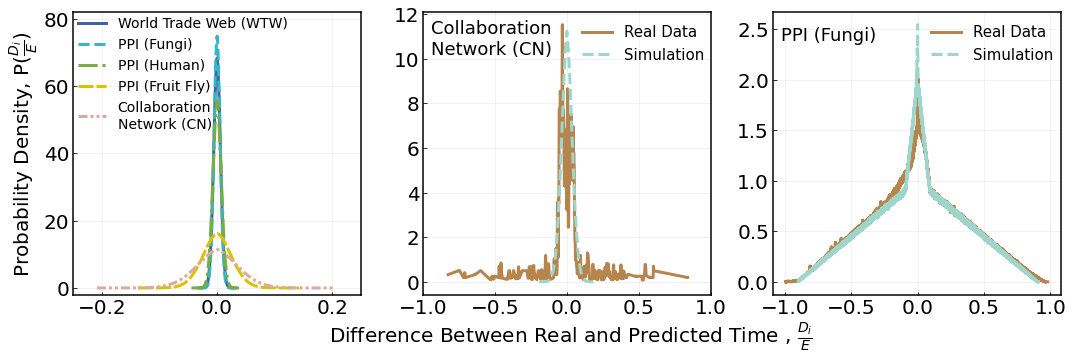

In [3]:
fig = plt.figure(figsize=(15, 5))
text_list = ['a', 'b', 'c']
two_networks = ['complex_networks_original', 'fungi']
text_two_networks = ['Collaboration\nNetwork (CN)', 'PPI (Fungi)']
net_color_list = ['#4063a3', '#34b6c6', '#79ad41', '#ddc000', '#d7aca1']

for counter in [1, 2, 3]:
    ax = plt.subplot(1, 3, counter)
    if counter == 1:
        network_list = ['WTW', 'fungi', 'human', 'fruit_fly', 'complex_networks_original']
        edge_size_list = [413, 598, 3249, 2840, 6000]
        label_list = ['World Trade Web (WTW)', 'PPI (Fungi)', 'PPI (Human)', 'PPI (Fruit Fly)', 
                      'Collaboration\nNetwork (CN)']
        linestyle_list = ['solid', 'dashed', 'dashdot', (0, (5, 1)), (0, (3, 1, 1, 1, 1, 1))]
        for i in range(5):
            network_name = network_list[i]
            data_df = pd.read_csv('../data/overall_error/theoretical_distribution/theoretical_distribution_'+ network_name +'.csv')
            ax.plot(data_df.D_E.values, data_df.probability_density.values, 
                     linestyle = linestyle_list[i], linewidth=3, c=net_color_list[i], label=label_list[i])
        ax.legend(fontsize=14, frameon=False, loc=(0.0, 0.56))
        plt.xlim(-0.25, 0.25)
        plt.ylim(-2, 82)
        ax.set_yticks([0, 20, 40, 60, 80])
        plt.ylabel('Probability Density, P($\\frac{D_i}{E})$', fontsize=20)

    if counter in [2, 3]:
        network_name = two_networks[counter - 2]
        data_df = pd.read_csv('../data/overall_error/real_distribution/real_distribution_'+ network_name +'.csv')
        plt.plot(data_df.D_E.values, data_df.probability_density.values, 
                 linewidth=3, c='#B6854D', label='Real Data') #c='C5'
        data_df = pd.read_csv('../data/overall_error/theoretical_map_distribution/theoretical_map_distribution_'+ network_name +'.csv')
        plt.plot(data_df.D_E.values, data_df.probability_density.values, 
                 linestyle = '--', linewidth=3, c='#9ed6cb', label='Simulation') #c='C9'
        ax.set_xticks([-1, -0.5, 0, 0.5, 1])
        if counter == 2:
            ax.text(0.03, 0.85, text_two_networks[counter-2], transform=ax.transAxes, fontsize=18)
        if counter == 3:
            ax.text(0.03, 0.9, text_two_networks[counter-2], transform=ax.transAxes, fontsize=18)
        plt.legend(fontsize=15, frameon=False, loc=(0.53, 0.8))
    
    plt.gca().grid(True, alpha=0.2)
    plt.tick_params(axis='both', which='both', direction = 'in', labelsize=20)
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.5)
    plt.tight_layout(w_pad=1)
    plt.subplots_adjust(bottom=0.17)
fig.text(-0.7, -0.17, 'Difference Between Real and Predicted Time , $\\frac{D_i}{E}$', ha='center',
    transform=ax.transAxes, fontsize=20)
plt.savefig('main_figures/fig3cde.pdf')

# fig4
### fig4a-4d

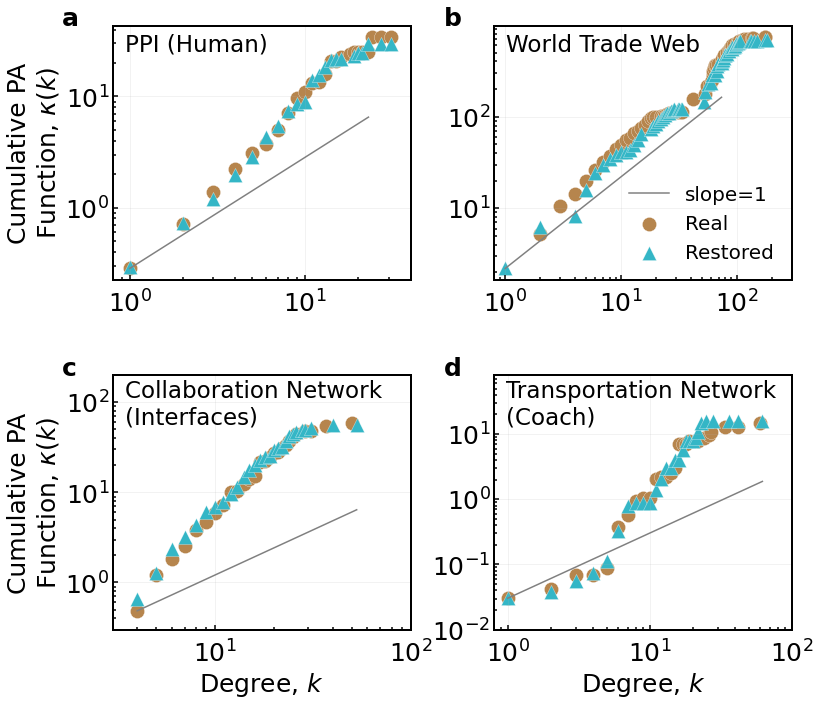

In [4]:
fig= plt.figure(figsize=(11.5, 10))
network_list = ['human', 'WTW', 'interfaces', 'coach']
title_list= ['PPI (Human)', 'World Trade Web (WTW)', 'Collaboration (Interfaces)', 
            'Transportation (Coach)']
title_list= ['PPI (Human)', 'World Trade Web', 'Collaboration Network\n(Interfaces)', 'Transportation Network\n(Coach)']
text_list = ['a', 'b', 'c', 'd']
xlim_list = [(0.8, 40), (0.8, 300), (3, 100), (0.8, 100)]
degree_list_end = [20, 40, 30, 30]
for counter in range(1, 5):
    ax = plt.subplot(2, 2, counter)
    network_name = network_list[counter-1]
    real_df = pd.read_csv('../data/preferential_attachment/'+ network_name + '_real_cummulative.csv')
    restored_df = pd.read_csv('../data/preferential_attachment/'+ network_name + '_restored_cummulative.csv')
    plt.scatter(real_df.degree_x, real_df.cummulative_increase, s=200, 
                color='#B6854D', edgecolor='white', linewidth=0.3, label='Real')
    plt.scatter(restored_df.degree_x, restored_df.cummulative_increase, s=200, 
                marker='^', color='#34b6c6',edgecolor='white', linewidth=0.3,  label='Restored')
    #degree_list = restored_df.degree_x[:int(2*len(restored_df)/3)].tolist()
    degree_list = restored_df.degree_x[:degree_list_end[counter-1]].tolist()
    y_start = min(restored_df.cummulative_increase[0], real_df.cummulative_increase[0])/degree_list[0]
    plt.plot(degree_list, y_start*np.array(degree_list), c='gray', label='slope=1')
    plt.xlim(xlim_list[counter-1])
    plt.xscale('log')
    plt.yscale('log')
    if counter == 2:
        plt.legend(fontsize=20, loc='lower right', frameon=False)
    if counter > 2:
        plt.xlabel('Degree, $k$', fontsize=25)
    if counter in [1, 3]:
        plt.ylabel('Cumulative PA\nFunction, $\kappa(k$)', fontsize=25)
    ax.tick_params(axis='x', which='major', pad=10)
    ax.tick_params(axis='both', which='major', length=5, width=1.5, direction = 'in', labelsize=25)
    ax.tick_params(axis='both', which='minor', length=3, width=1.5, direction = 'in', labelsize=25)
    #plt.title(title_list[counter - 1], fontsize=20)
    if counter == 3:
        plt.ylim(0.3, 200)
        ax.text(0.04, 0.81, title_list[counter - 1], transform=ax.transAxes, fontsize=23)
    elif counter == 4:
        plt.ylim(0.01, 80)
        ax.text(0.04, 0.81, title_list[counter - 1], transform=ax.transAxes, fontsize=23)
    else:
        ax.text(0.04, 0.9, title_list[counter - 1], transform=ax.transAxes, fontsize=23)
    ax.text(-0.17, 1, text_list[counter-1], transform=ax.transAxes, fontsize=25, weight='bold')
    plt.gca().grid(True, alpha=0.2)
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
    plt.tight_layout(w_pad=0, h_pad=4)
    plt.subplots_adjust(top=0.95)
fig.savefig('main_figures/fig4abcd.pdf')

### fig4e

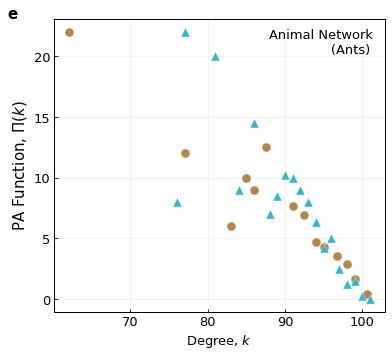

In [5]:
fig, ax = plt.subplots(figsize=(5.5, 5))
network_name = 'ants'
real_df = pd.read_csv('../data/preferential_attachment/'+ network_name + '_real.csv')
restored_df = pd.read_csv('../data/preferential_attachment/'+ network_name + '_restored.csv')
real_group_df = real_df.groupby(pd.cut(real_df['degree_x'], bins=30)).mean()
real_group_df = real_group_df.dropna()
restored_group_df = restored_df.groupby(pd.cut(restored_df['degree_x'], bins=30)).mean()
restored_group_df = restored_group_df.dropna()
plt.scatter(real_group_df.degree_x, real_group_df.degree_increase, s=80, 
            color='#B6854D', edgecolor='white', linewidth=0.3, label='Real')
plt.scatter(restored_group_df.degree_x, restored_group_df.degree_increase, s=80, 
            marker='^', color='#34b6c6', edgecolor='white', linewidth=0.3, label='Predicted')
plt.ylabel('PA Function, $\Pi(k$)', fontsize=15)
plt.xlabel('Degree, $k$', fontsize=13)
#plt.legend(fontsize=12, loc='lower left',  frameon=False)
plt.tick_params(axis='both', which='both', direction = 'in', labelsize=13)
ax.text(0.65, 0.88, 'Animal Network\n               (Ants)', transform=ax.transAxes, fontsize=13)
ax.text(-0.14, 1, 'e', transform=ax.transAxes, fontsize=15, weight='bold')
plt.gca().grid(True, alpha=0.2)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
fig.savefig('main_figures/fig4e.pdf')

# fig5

In [6]:
converters = {col: lambda x: np.array(ast.literal_eval(x)) for col in ['hit_adj', 'hit_realT', 'hit_restoredT']}
tsvd_all_df = pd.read_csv('../data/tsvd_link_prediction/tsvd_link_prediction_all.csv', 
                       converters=converters)

In [7]:
tsvd_all_df['real_sum'] = [np.cumsum(array).sum() for array in tsvd_all_df.hit_realT.values]
tsvd_all_df['restored_sum'] = [np.cumsum(array).sum() for array in tsvd_all_df.hit_restoredT.values]

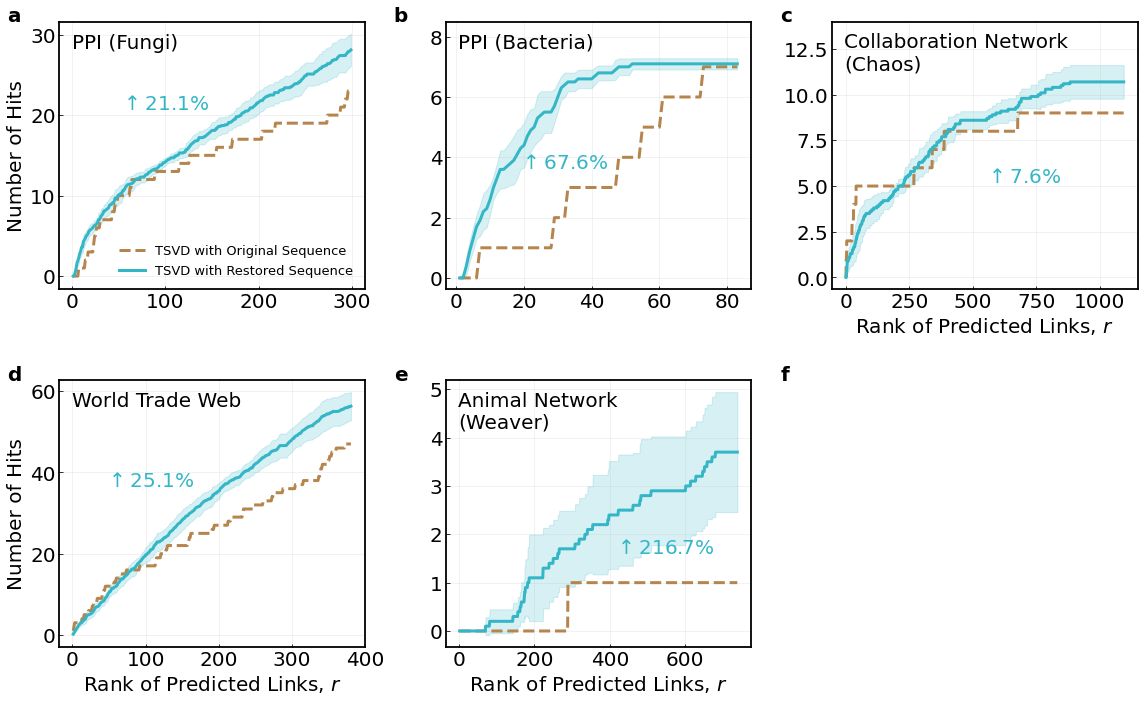

In [8]:
network_list = ['fungi', 'bacteria', 'chaos', 'WTW', 'weaver', 'ants']
title_list= ['PPI (Fungi)', 'PPI (Bacteria)', 'Collaboration Network\n(Chaos)', 
            'World Trade Web', 'Animal Network\n(Weaver)', 'Animal Network\n(Ants)']
text_list = ['a', 'b', 'c', 'd', 'e', 'f']
up_text_position = [(0.2, 0.67), (0.24, 0.45), (0.5, 0.4), (0.15, 0.6), (0.55, 0.35), (0.1, 0.6)]
fig = plt.figure(figsize = (16, 10))
for counter in range(1, 6):
    ax = plt.subplot(2, 3, counter)
    network_name = network_list[counter - 1]
    temp_network_df = tsvd_all_df.query('network_name == "{}"'.format(network_name))
    xlength = len(temp_network_df.hit_restoredT.iloc[0])
    real_df = temp_network_df.query('real_sum == {}'.format(temp_network_df.real_sum.max())).iloc[0]
    plt.plot(range(1, xlength+1), np.cumsum(real_df.hit_realT), 
             c='#B6854D', linewidth=3, linestyle='--', label = 'TSVD with Original Sequence')
    optimal_restored_list = []
    for i in range(1, 11):
        temp_counter_df = temp_network_df.query('counter == {}'.format(i))
        temp_restored_list = temp_counter_df.query('restored_sum == {}'.format(temp_counter_df.restored_sum.max())).iloc[0].hit_restoredT
        optimal_restored_list.append(temp_restored_list)
    y_list = np.cumsum(np.mean(optimal_restored_list, axis=0))
    std_list = np.std([np.cumsum(i) for i in optimal_restored_list], axis=0)
    confidence_interval_95 = 1.96*std_list/np.sqrt(10)
    plt.plot(range(1, xlength+1), y_list, c='#34b6c6', linewidth=3, label = 'TSVD with Restored Sequence')
    plt.fill_between(range(1, xlength+1), y_list - confidence_interval_95, y_list + confidence_interval_95, color='#34b6c6', alpha=0.2)

    if real_df.hit_realT.sum() == 0:
        temp_up = '$+\\infty$'
    else:
        temp_up = round((np.cumsum(np.mean(optimal_restored_list, axis=0)).sum()/np.cumsum(real_df.hit_realT).sum() - 1)*100, 1)
    ax.text(up_text_position[counter-1][0], up_text_position[counter-1][1],
            '$\\uparrow$'+ str(temp_up)+'%', color='#34b6c6', transform=ax.transAxes, fontsize=20)
    plt.tick_params(axis='both', which='both', direction = 'in', labelsize=20)
    if counter == 6:
        plt.ylim(0, plt.ylim()[1])
    if counter > 2:
        plt.xlabel('Rank of Predicted Links, $r$', fontsize=20)
    if counter in [1, 4]:
        plt.ylabel('Number of Hits', fontsize=20)
    if counter == 1:
        plt.legend(fontsize=13, loc='lower right', frameon=False)
    if counter == 2:
        plt.ylim(plt.ylim()[0], 8.5)
    if counter == 3:
        plt.ylim(plt.ylim()[0], 14)
    ax.text(-0.17, 1, text_list[counter-1], transform=ax.transAxes, fontsize=20, weight='bold')
    if counter in [3, 5, 6]:
        ax.text(0.04, 0.82, title_list[counter - 1], transform=ax.transAxes, fontsize=20)
    else:
        ax.text(0.04, 0.9, title_list[counter - 1], transform=ax.transAxes, fontsize=20)
    plt.gca().grid(True, alpha=0.2)
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.8)
    #plt.title(title_list[counter-1]+', K = %s, $\\theta$ = %s'%(k, theta), fontsize=20)
    plt.tight_layout(w_pad=1, h_pad=3)
    plt.subplots_adjust(top=0.95)
ax = plt.subplot(2, 3, 6)
ax.axis('off')
ax.text(-0.17, 1, text_list[5], transform=ax.transAxes, fontsize=20, weight='bold')
plt.tight_layout(w_pad=1, h_pad=3)
plt.subplots_adjust(top=0.95)
fig.savefig('main_figures/fig5.pdf')